In [53]:
# Import necessary libraries
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Create the first class which is responsible for Task 1,2 and 3
class script_clean:
    
    # Created a constructor class which takes input and outfile and will be called when a class object is created
    def __init__(self, input_file, output_file):
        self.input_file = input_file
        self.output_file = output_file
    
    # This function writes the output (l1) in the user given output file
    def write_output(self,l1):
        with open(self.output_file, 'w') as op:
            op.write(str(l1)) #convert list into a string and write it into an outfile text file
            
    # This function is used to read, extract and clean the input script file
    def write_clean_data(self):
        startpat =r'\[Scene' # Initialised the pattern from where the dialouges starts
        flag = False #flag set to false
        l1 = [] # created an empty list which will contain the list of tuples
        
        # Open the input script file and read line by line
        with open(self.input_file,'r') as f:
            for line in f.readlines():
                if re.match(startpat,line): # If condition when line matches with the pattern
                    flag = True #flag is set to true 
                    continue #continue with the loop
                else:
                    if(flag): #if condition for when flag is false 
                        r = re.sub(r'\(.*?\)',"",line) # Replace with a null string if '( meta data)' is found
                        r = re.sub(r'^\[.*\]$',"",r) # Replace with a null string if '[ meta data]' is found
                        if(re.match(r'.*\:.*',r)): # When dialogues are matched with ' : ', split the line into two parts 
                            temp = [r.strip() for r in r.split(":")] #strip any spaces at the beginning and at the end of the string and store those two parts into a temp list
                            #print(temp)
                            l1.append(tuple(temp)) #convert the temp list into a tuple and append it to a new empty list l1 to make a list of tuples where the first item of each tuple is the character name, and the second item of which is thecorresponding cleaned dialogue 
            print(l1)                    
        self.write_output(l1)# call another function to write l1 in an output file
        return l1 #this functions returns l1
    
    
    
    def dialouge_files(self,l1): # This function takes l1 as it's value 
        d = {} # created an empty dictionary where key is the char name and it's values will be a list of all their dialouges 
        for values in l1:
            char = values[0] # char will have the 0th item aka the character names
            conv = values[1] # conv will have the 1st item aka the dialogues
            if char in d.keys(): # If the character exists in the dictionary, enter the if loop
                d[char].append(conv) #and append the dialogue to it's respective character
            else:
                conv_list = [] # An empty list to store all the dialogues from the same character 
                conv_list.append(conv) 
                #print(conv_list)
                d[char] = conv_list
            #print(d[char])
            
        #  this for loop opens a new text file for every character and writes their dialogue in it
        for key in d.keys():
            file = "31972896_"+ key.lower() +'.txt' #contact required file name
            with open(file, 'w') as f:
                value = d.get(key)
                #print (value)
                for v in value:
                    f.write(str(v) + '\n')
        #print(d)
        return d # This function returns the dictionary
    
    def frequent_words(self,d):

        df = pd.DataFrame() # Made a dataframe
        
        for key,value in d.items():
            list1 = d.get(key) #list1 consists of all the values(dialouges) for every key(character) from the dictionary d
            #print(list1) 
            word_list = []   #creating an empty word_list                     

            for convo in list1:
                temp = convo.split(" ") # Split the dialogue into words by space and store it into temp 
                #print(temp)
                temp2 = [i.lower() for i in temp] #iterate i over ever word in the list and convert it into lower case
                #print(temp2)
                for each in temp2:
                    word_list.append(each) #append each individual word into word_list
                #print(set(word_list))
                # Finding roles who have spoken more than 100 unique words
            if len(set(word_list)) > 100: #convert it into a set to get all the unique words and find it's length
    
                line_freq = {} # creating an empty dictionary where key will be the unique word and it's value will be the word count
                for convo in list1: # Traversing through each conversation in the list of conversations      
                    unique = [] # An empty list that becomes empty for each conversation. 
                                # It acts as a flag to know whether that particular word is alread added for the line frequency
                                # In other words we should not count the same word appearing twice in a single line as 2
                    temp = convo.split(" ") # splitting words for each conversation
                    temp2 = [i.lower() for i in temp] #temp2 stores all the words in lowercase

                    #print(temp2)
                
                
                    for word in temp2:       # traversing through all the words in a single conversation.

                        if word in line_freq.keys() and word not in unique:
                            line_freq[word] += 1
                            unique.append(word)
                        elif word not in line_freq.keys():
                            line_freq[word] = 1
                            unique.append(word)
                #print(line_freq)     

        
        
                # This prints out the top 5 words with the highest line frequenices
                c = sorted(line_freq.items(), key=lambda x: x[1],reverse = True)[:5]
                # Dataframe with two columns
                friends = pd.DataFrame(c, columns =['Words', 'Count'])
                friends.insert(0, 'Role', key)
                df = df.append(friends, ignore_index=True)
        df.to_csv("31972896_data.csv",index=False) #Convert it into a csv file
        #print(df)
        
        
# Second class created to perform task 4
class visualisation: 
    
    # Created a constructor class and will be called when a class object is created
    def __init__(self, input_file):
        self.input_file = input_file
        
    # This method will plot a bar chart for all the roles in the Dataframe   
    def plot(self):
        data = pd.read_csv(self.input_file) #data is being read from the csv file
        df = pd.DataFrame(data) #convert the data into a dataframe
        char_list = [] #create an empty list
        char_list = df.Role.unique() #find all the unique roles from the column
        # m = nrows
        # n = ncols
        n = 3 #set the number of columns as 3
        m = len(char_list) #set the number row as the length of the char_list i.e total number of unique roles in a table
        x = 1 #set index as 1
        plt.figure(figsize = (28,50))
        # for loop to iterate over every item in char_list and plot a bar chart for each role
        for i in char_list:
            if i in char_list:
                temp = df[df["Role"] == i] #store the current row in a temp variable 
                plt.subplot(m,n,x) #using subplot to create grid of subplots with a single call
                plt.bar(temp['Words'], temp['Count']) #bar plot takes xaxis as words and on y axis, Count of words
                plt.xticks(rotation = 45) #rotate the words to avoide overlapping
                plt.title(i) # put title of each subplot as the character name
                x = x + 1
        plt.show()

    
    
    

[('Ross', 'Hey, remember when I had a monkey?'), ('Chandler', 'Yeah.'), ('Ross', 'Yeah, what, what was I thinking?'), ('Joey', 'Hey! So, what’s with the 20 percent tip? Did I do something wrong?'), ('Chandler', 'Twenty percent is a pretty generous tip Joe.'), ('Joey', 'Y’know what’s more generous than that?! Fifty percent! Y’know what’s even more generous than that?!!'), ('Chandler', 'I see where you’re goin’!'), ('Ross', 'What’s up with the greed Joe?'), ('Joey', 'All right, look I’m sorry you guys, but it’s just that I gotta get these new head shots made. And they’re really expensive, y’know? I’m down to like three! Well, actually two ‘cause one of ‘em I kinda blackened in some teeth—Why did I do that?!'), ('Ross', 'Well isn’t there something you can do to earn a little extra money? I mean, can’t-can’t you pick up, I don’t know, an extra shift here?'), ('Phoebe', 'Or, y’know, I used to beg for money. Of course it helps if you’ve got y’know a little of this  goin’ on. Wow! I still hav

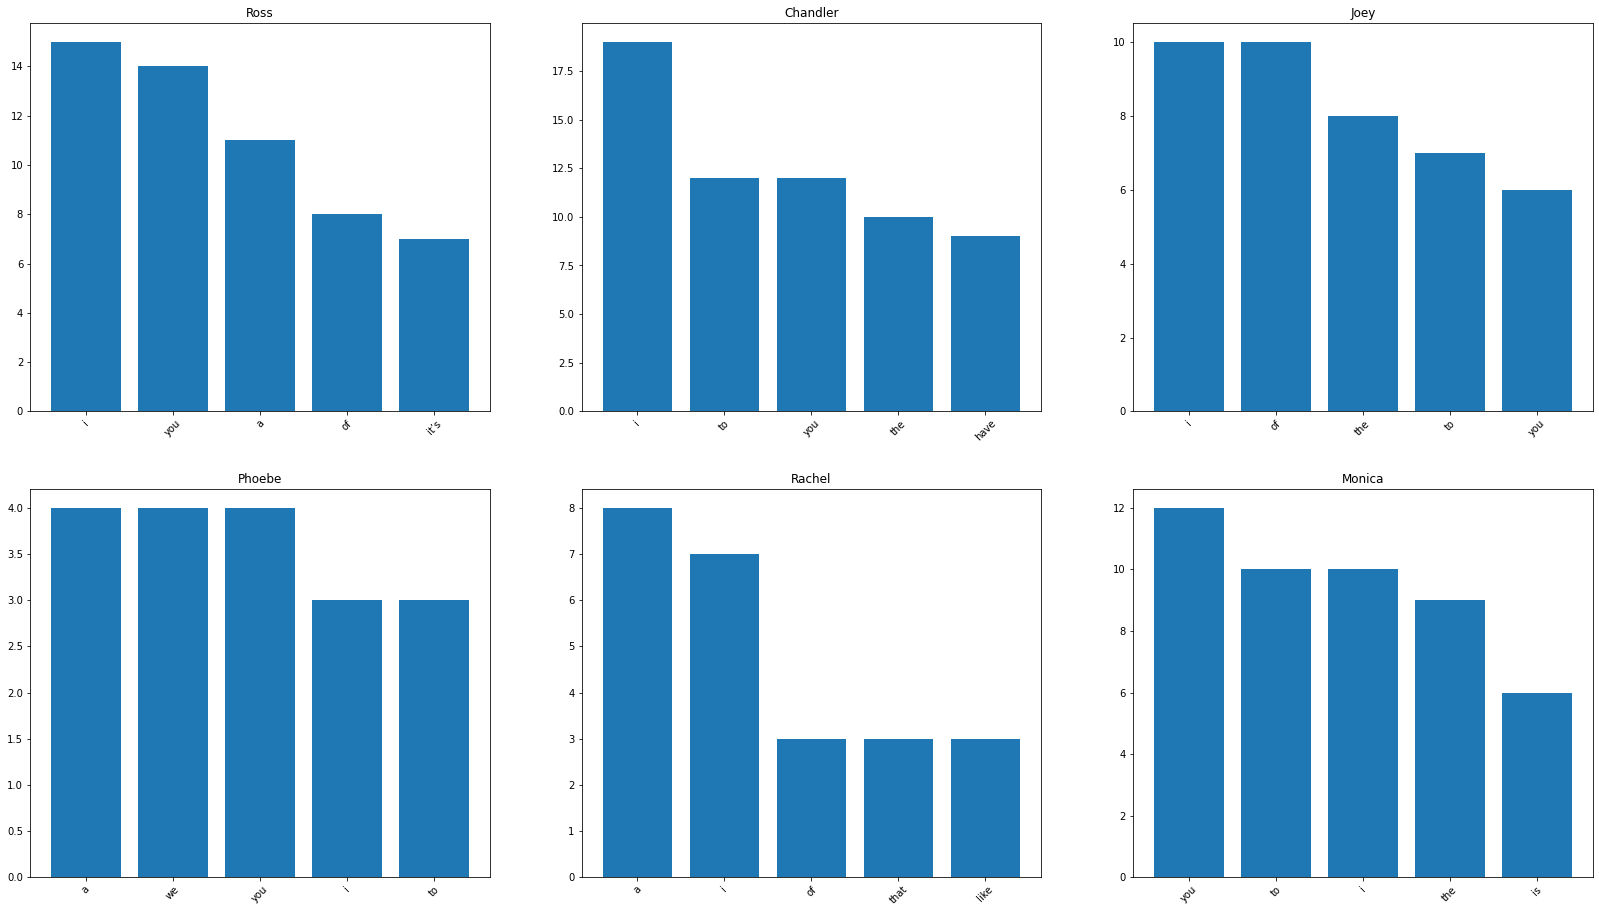

In [54]:
c1 = script_clean('input_script.txt','31972896_clean_dialogue.txt')
l1 = c1.write_clean_data()
d = c1.dialouge_files(l1)
c1.frequent_words(d)
p1 = visualisation("31972896_data.csv")
p1.plot()

## Justifying the choice of the graph

- A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Here, our categorical variable is the words and the corresponding numeric variable is it's count. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value. 
- Bar graphs are used to compare things between different groups. Since, we are comparing the top 5 words for each role, bargraph is the best choice. 
- I also decided it would be best to use the subplots() function in the matplotlib library to plot barplots of each character as it helps in creating multiple layouts of subplots. It provides control over all the individual plots that are created.
- We can efficiantly compare all the barplot for each character in one glance and it also gives us the precise observation as every plot is of the same dimension. 

## Observations

- We can observe that the maximum count of a word among all the character is 'i' by Chandler with a count of 19
- We can observe that the minimum count of a word is 3 for several different words spoken by Rachel and Phoebe
- Phoebe has the lowest overall count of words with a maximum of just 4
- Chandler has the highest overall count of words follwed by Ross and Monica
- We observe that single letter words like 'a', 'you', 'i' have the highest count which is expected.
- Phoebe has three words with the same count 4; "a", "we", "you" and two words with the same count 3; "i", "to"

